In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [29]:
data=pd.read_csv("Load_Data.csv")
data.head()

,0
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [11]:
z=np.abs(stats.zscore(data))
print(z)

[[0.08229398]
 [0.08782374]
 [0.07705526]
 ...
 [0.09743715]
 [0.07254415]
 [0.03178457]]


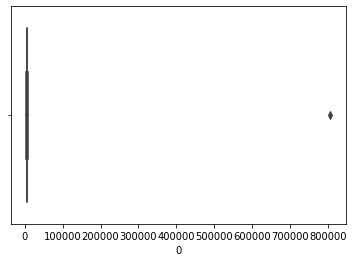

In [32]:
sns.boxplot(x=data['0'])

In [34]:
df=data
q=df['0'].quantile(0.99)
df[df['0']<q]
q_low=df['0'].quantile(0.01)
q_hi=df['0'].quantile(0.99)
df_filtered=df[(df['0']<q_hi)&(df['0']>q_low)]
df_filtered.head()

,0
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [35]:
print(len(data))
print(len(df_filtered))
if(len(data)==len(df_filtered)):
    print('No outliers')

2183
2139


In [36]:
data=df_filtered
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,0
0,0.254941
1,0.235273
2,0.273574
3,0.299162
4,0.391518


In [37]:
#SPLIT DATA
train_data,test_data=train_test_split(data_n,test_size=0.1)
print(len(train_data))
train_data.head()

1925


,0
736,0.862065
3,0.299162
181,0.935949
160,0.633488
1692,0.467150


In [39]:
x=[]
y=[]
for i in range(len(train_data.iloc[:,0])-24):
    x.append(train_data.iloc[i,0])
    y.append(train_data.iloc[i+24,0])

In [40]:
#TRAIN DATA
m=1
c=-1
epochs=25  # epochs
l=0.1      # learning rate
ns=len(x)
gama=0.9
vm=0
vc=0
err=[]
for i in range(epochs):
    er=0
    for j in range(len(x)):
        er+=((y[j]-(m*x[j])-c))**2
        gm=((-1.0)*(y[j]-m*x[j]-c)*(x[j]))
        gc=((-1.0)*(y[j]-m*x[j]-c))
        vm=(gama*vm)-(l*gm)
        vc=(gama*vc)-(l*gc)
        m=m+vm
        c=c+vc
        er=(1/(2*len(x)))*(er)
        err.append(er)
print("The local minimum occurs at m =%.2f"%(m),", c = %.2f"%(c))

The local minimum occurs at m =-0.09 , c = 0.33


In [41]:
yp=[]
for i in range(len(x)):
    p=m*x[i]+c
    yp.append(p)
sum=0
for i in range(len(x)):
    sum+=(y[i]-yp[i])**2
    mse=sum/len(x)
print("Mean Square Error (MSE) : ",mse)

Mean Square Error (MSE) :  0.07863863677732467


Text(0.5, 1.0, 'Predicted data vs Actual data')

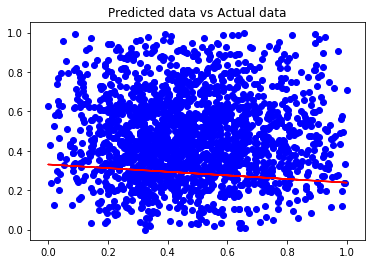

In [44]:
plt.plot(np.array(x),np.array(yp),'red')
plt.scatter(np.array(x),np.array(y),color='blue')
plt.title("Predicted data vs Actual data")

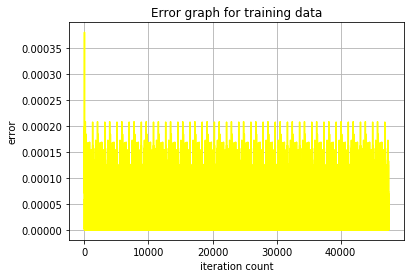

In [45]:
iters=np.arange(epochs*len(x))
plt.plot(iters,err,'yellow')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [47]:
tx=[]
ty=[]
for i in range(len(test_data.iloc[:,0])-24):
    tx.append(test_data.iloc[i,0])
    ty.append(test_data.iloc[i+24,0])

yp1=[]
for i in range(len(tx)):
    p1=m*tx[i]+c
    yp1.append(p1)
sum=0
for i in range(len(tx)):
    sum+=(ty[i]-yp1[i])**2
    mse1=sum/len(tx)
print("Mean Square Error (MSE) : ",mse1)

Mean Square Error (MSE) :  0.07435525275167637


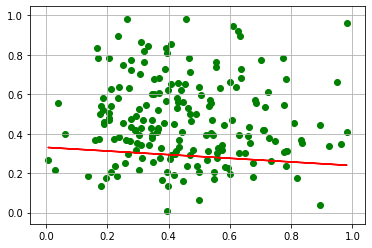

In [48]:
plt.scatter(tx,ty,color='green')
plt.plot(tx,yp1,'red')
plt.grid()

In [49]:
x_max=y_max= 8841.669480
x_min=y_min= 3377.919600
x2= float(input("Enter load of previous hour : "))
xi=(x2-x_min)/(x_max-x_min)
yi=m*xi+c
yi=yi*(y_max-y_min)+y_min
print("Load at hour based on its previous hour {} is : {}".format(x2,yi))

Enter load of previous hour : 4983.17184
Load at hour based on its previous hour 4983.17184 is : 5036.202018263731
